In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import networkx as nx
import queue


In [2]:
time = 10
energy = 10

pathway of our maze: S - - - - # - - - - - - - # - - - - - - - - - - # - - - - E

'S' - starting point
'-' - pathway 
'#' - decision point
'E' - end point

In [3]:
# Helper functions to work with the Maze

def printBinaryMaze(mazeGrid):
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Simple print of the corresponding maze
    '''
    #(width) = mazeGrid.shape
    
    
    print()
    for i in mazeGrid:
        if i == 1:
            print("\u25a9", end = " ")   # use some other character if the unicode does not print properly
        elif i == 0:
            print(".", end = " ")
    print()
        

'''def showBinaryMaze(mazeGrid):
    Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Heatmap grid of the corresponding maze
    (height,width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    f = plt.figure(figsize = (width))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)
    
    
def showBinaryMazeProblem(mazeGrid, start, goal):
    Display the maze corresponding to a binary grid
        Display "start" and "goal" position on the grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinate of the "start" and "goal"
        Output : Heatmap grid of the maze with markers
    
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255
    
    mazeGrid[start[0], start[1]] = 128
    mazeGrid[goal[0], goal[1]] = 128
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)'''

'def showBinaryMaze(mazeGrid):\n    Display the maze corresponding to a binary grid\n        Input : 2D NumPy array with 0 and 1 as elements\n        Output : Heatmap grid of the corresponding maze\n    (height,width) = mazeGrid.shape\n    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale\n    \n    f = plt.figure(figsize = (width))\n    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)\n    \n    \ndef showBinaryMazeProblem(mazeGrid, start, goal):\n    Display the maze corresponding to a binary grid\n        Display "start" and "goal" position on the grid \n        Input : 2D NumPy array with 0 and 1 as elements\n        Input : 2D coordinate of the "start" and "goal"\n        Output : Heatmap grid of the maze with markers\n    \n    (height, width) = mazeGrid.shape\n    mazeGrid = mazeGrid * 255\n    \n    mazeGrid[start[0], start[1]] = 128\n    mazeGrid[goal[0], goal[1]] = 128\n    \n    f = plt.figure(figsize 

In [4]:
def printBinaryMaze(mazeGrid):
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Simple print of the corresponding maze
    '''
    #(width) = mazeGrid.shape
    
    
    print()
    for i in mazeGrid:
        if i == 1:
            print("\u25a9", end = " ")   # use some other character if the unicode does not print properly
        elif i == 0:
            print(".", end = " ")
    print()

In [5]:
# Create the Maze
# 0 : empty cell, reachable within a path
# 1 : blocked cell or wall, not reachable

maze = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


# Convert to a NumPy array
maze = np.array(maze)

# Print the maze using helper functions
print("Maze of dimensions", maze.shape)
printBinaryMaze(maze)

Maze of dimensions (20,)

. . . . ▩ . . . . . . ▩ . . ▩ . . . . . 


In [6]:
# Define start and goal positions
START = (0,0)
GOAL = (0, len(maze))

# Show the maze using helper functions
showBinaryMazeProblem(maze, START, GOAL)

NameError: name 'showBinaryMazeProblem' is not defined

In [7]:
# Create a Graph class
class MazeGraph(object):
    ''' Class to represent a Graph
        Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {}
    
    def all_edges(self):
        return self.edges
    
    def neighbors(self, node):
        return self.edges[node]    

In [8]:
# Function to convert a maze to a graph
def maze_to_graph(mazeGrid):
    ''' Converts a 2D binary maze to corresponding graph
        Input : 2D NumPy array with 0 and 1 as elements
        Output : MazeGraph corresponding to input maze
    '''
    mazeGraph = MazeGraph()
    #(height, width) = mazeGrid.shape
    
    decisions = []
    
    
    for j in range(len(mazeGrid)):
        neighbors = []
        
        #print(j)
        # Only consider blank cells as nodes
        if mazeGrid[j] == 0 or mazeGrid[j] == 1:
            if mazeGrid[j] == 1:
                decisions.append(j)
                if (len(decisions)) > 1:
                    neighbors.append(((decisions[len(decisions)-2]),1))
                
            # Adjacent cell : Left                
            if (j > 0):
                neighbors.append(((j-1),1))
                #neighbors.append(((j-1),3))
                #neighbors.append(((j-1),5))
                #neighbours.append()

            # Adjacent cell : Right                    
            if (j < len(mazeGrid) - 1):
                neighbors.append(((j+1),1))
                #neighbors.append(((j+1),3))
                #neighbors.append(((j+1),5))
                
            if j == (len(mazeGrid)-1):
                neighbors.append(((decisions[len(decisions)-1]),1))
                
            
                

            # Insert edges in the graph
            if len(neighbors) > 0:
                mazeGraph.edges[(j)] = neighbors
        
    return mazeGraph

In [9]:
# Convert the thing to a graph
mazegraph = maze_to_graph(maze)

# Print the edges with weights
mazegraph.all_edges()

{0: [(1, 1)],
 1: [(0, 1), (2, 1)],
 2: [(1, 1), (3, 1)],
 3: [(2, 1), (4, 1)],
 4: [(3, 1), (5, 1)],
 5: [(4, 1), (6, 1)],
 6: [(5, 1), (7, 1)],
 7: [(6, 1), (8, 1)],
 8: [(7, 1), (9, 1)],
 9: [(8, 1), (10, 1)],
 10: [(9, 1), (11, 1)],
 11: [(4, 1), (10, 1), (12, 1)],
 12: [(11, 1), (13, 1)],
 13: [(12, 1), (14, 1)],
 14: [(11, 1), (13, 1), (15, 1)],
 15: [(14, 1), (16, 1)],
 16: [(15, 1), (17, 1)],
 17: [(16, 1), (18, 1)],
 18: [(17, 1), (19, 1)],
 19: [(18, 1), (14, 1)]}

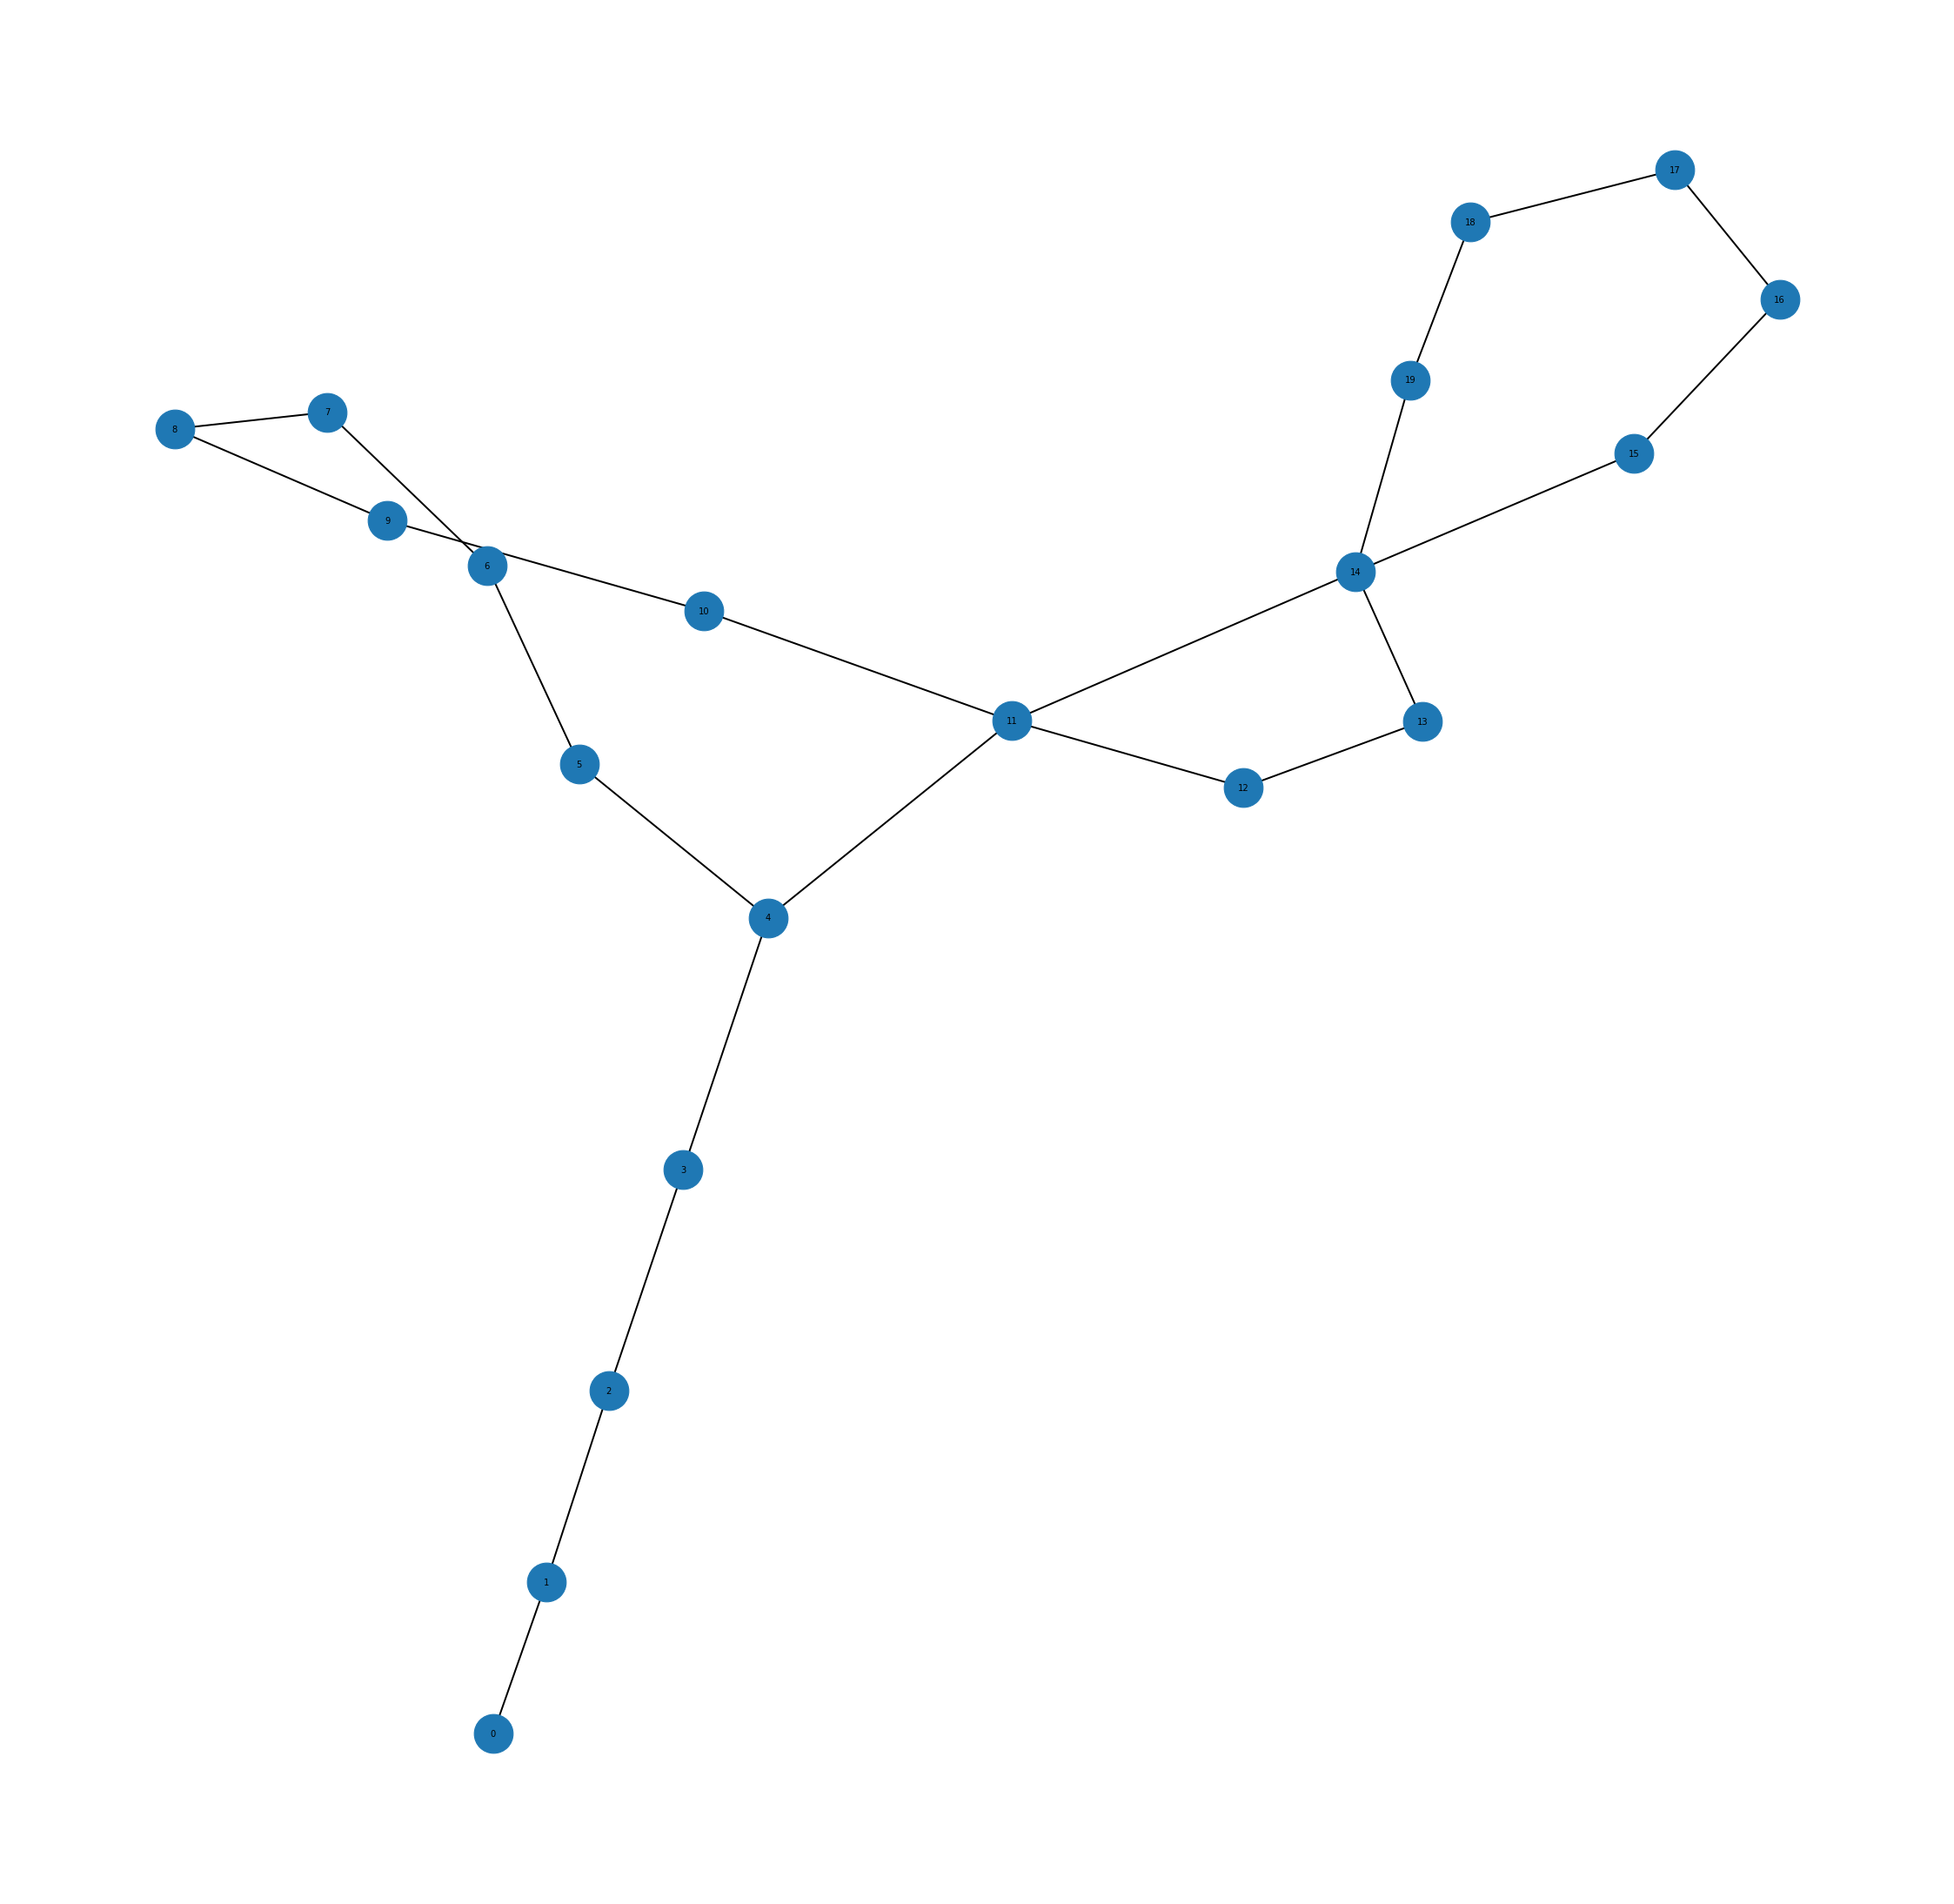

In [13]:
# Helper functions to display a Graph

def showBinaryMazeGraph(mazeGraph):
    ''' Display a graph using networkx
        Input : MazeGraph from 2D maze
        Output : Input graph displayed
    '''
    edgeDict = mazeGraph.all_edges()
    edgeList = []
    print()
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 2)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()
    
# Show the graph using helper functions
# The layout may change every time you run this cell
# However, the graph (nodes, edges) remains the same

showBinaryMazeGraph(mazegraph)

Depth-First Search

In [14]:
def depth_first_search(graph, start, goal):
    ''' Depth First Search algorithm to find a path in a graph from start to goal
        Input : graph (MazeGraph), start node, goal node
        Output : Path from start to goal (list of nodes), or None if no path exists
    '''
    visited = set()  # Set to keep track of visited nodes
    path = []        # List to store the path
    
    # Define the recursive function
    def dfs_rec(node):
        if node == goal:
            path.append(node)
            return True
        
        visited.add(node)
        path.append(node)
        
        for neighbor, _ in graph.neighbors(node):
            if neighbor not in visited:
                if dfs_rec(neighbor):
                    return True
        
        path.pop()  # Remove the node from the path if it doesn't lead to the goal
        return False
    
    # Call the recursive function starting from the start node
    dfs_rec(start)
    
    if path:  # If a path is found
        return path
    else:
        return None  # If no path exists

# Now, let's use the depth-first search algorithm to find a path in the maze
start_node = START[0]  # Assuming START is a tuple (row, column), we'll use the row index
goal_node = GOAL[0]    # Similarly, assuming GOAL is a tuple (row, column), we'll use the row index

path = depth_first_search(mazegraph, start_node, goal_node)

if path:
    print("Path found from start to goal:")
    print(path)
else:
    print("No path found from start to goal.")


Path found from start to goal:
[0]


Path found from start to goal:
[0]


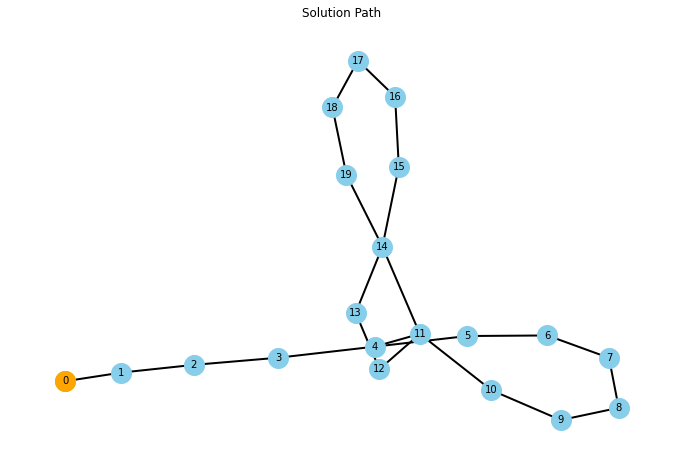

In [15]:
def showBinaryMazeGraphWithPath(mazeGraph, solution_path):
    ''' Display a graph using networkx with solution path highlighted
        Input : mazeGraph (MazeGraph), solution_path (list of nodes)
        Output : Graph displayed with solution path highlighted
    '''
    edgeDict = mazeGraph.all_edges()
    edgeList = []
    
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node, neighbor, {'weight': weight}))
    
    G = nx.Graph()
    G.add_edges_from(edgeList)
    
    # Highlight solution path nodes and edges
    solution_nodes = set(solution_path)
    solution_edges = [(solution_path[i], solution_path[i+1]) for i in range(len(solution_path)-1)]
    
    f = plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=400, node_color='skyblue')
    nx.draw_networkx_nodes(G, pos, nodelist=solution_nodes, node_size=400, node_color='orange')
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2)
    nx.draw_networkx_edges(G, pos, edgelist=solution_edges, width=2, edge_color='orange')
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    plt.axis("off")
    plt.title('Solution Path')
    plt.show()

# Now, let's find the solution path using DFS and visualize it
solution_path = depth_first_search(mazegraph, start_node, goal_node)

if solution_path:
    print("Path found from start to goal:")
    print(solution_path)
    showBinaryMazeGraphWithPath(mazegraph, solution_path)
else:
    print("No path found from start to goal.")


Universal Cost Search

Lowest cost path found from start to goal using Uniform Cost Search:
[0]


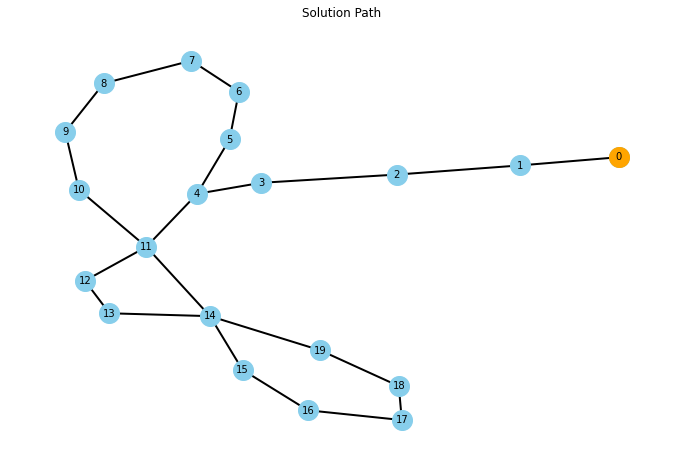

In [16]:
def uniform_cost_search(graph, start, goal):
    ''' Uniform Cost Search algorithm to find the lowest cost path in a graph from start to goal
        Input : graph (MazeGraph), start node, goal node
        Output : Lowest cost path from start to goal (list of nodes), or None if no path exists
    '''
    frontier = queue.PriorityQueue()  # Priority queue to store nodes to explore
    frontier.put((0, start))          # Start node with cost 0
    
    came_from = {}  # Dictionary to store parent nodes
    cost_so_far = {}  # Dictionary to store cost from start to each node
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        _, current = frontier.get()  # Get the node with the lowest cost
        
        if current == goal:
            break
        
        for next_node, cost in graph.neighbors(current):
            new_cost = cost_so_far[current] + cost
            if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                cost_so_far[next_node] = new_cost
                priority = new_cost
                frontier.put((priority, next_node))
                came_from[next_node] = current
    
    # Reconstruct path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    
    if path:
        return path
    else:
        return None

# Now, let's use the uniform cost search algorithm to find the lowest cost path in the maze
solution_path_ucs = uniform_cost_search(mazegraph, start_node, goal_node)

if solution_path_ucs:
    print("Lowest cost path found from start to goal using Uniform Cost Search:")
    print(solution_path_ucs)
    showBinaryMazeGraphWithPath(mazegraph, solution_path_ucs)
else:
    print("No path found from start to goal.")
